## Assignment 3:  Convolutional networks for TF ChIP-seq data

In this assignment you will build on the convolutional networks we looked at in class and work on ChIP-seq data for four transcription factors in arabidopsis.


### Part 1: Data Preparation

In this assignment you will work with ChIP-seq for four arabidopsis transcription factors:  AGL16, GRF1, AMS, and MYB3R4.  The peaks that represent their binding sites in the arabidopsis genome are available in the following links:

* AGL16 ([bed file](https://biobigdata.nju.edu.cn/ChIPHub_download/arabidopsis_thaliana/SRP187795/hammock/AGL16.target.all.bed.gz))
* GRF1 ([bed file](https://biobigdata.nju.edu.cn/ChIPHub_download/arabidopsis_thaliana/SRP002566/hammock/SRX021610.peak.all.bed.gz))
* AMS ([bed file](https://biobigdata.nju.edu.cn/ChIPHub_download/arabidopsis_thaliana/SRP188198/hammock/SRX5507861.peak.all.bed.gz))
* MYB3R4 ([bed file](https://biobigdata.nju.edu.cn/ChIPHub_download/arabidopsis_thaliana/SRP244735/hammock/SRX7616358.peak.all.bed.gz)).

These files are in [bed format](https://en.wikipedia.org/wiki/BED_(file_format)), and contain the information on the genomic locations where the ChIP-seq peaks have been detected.  The linked wikipedia article provides the information you need about the format of these files.  Your task is to extract sequences of length 500 centered at the location of each peak, which you will provide as input to the convolutional network you train.  

The other piece of information you need is the genomic sequence for arabidopsis.  This is available from the [Ensembl plants arabidopsis portal](https://plants.ensembl.org/Arabidopsis_thaliana/Info/Index).  In that page click on "Download DNA sequence (FASTA)", and the first five files provide the sequences for the five arabidopsis chromosomes.
For reference, we computed the result for AGL16 (link is in the assignment page in Canvas).

Your final data preparation task is to prepare a labeled dataset with positive examples that correspond to the peak sequences.  As negative examples, use random permutations of the positive examples.  Create one permutation from each positive example.

In [2]:
from numpy import random
import os

import pandas as pd

import numpy as np

#path='/mnt/c/Users/hunte/Desktop/CS525'
path=r'C:\Users\hunte\Desktop\CS525'
os.chdir(path)

import warnings
warnings.filterwarnings(action='once')

import pybedtools #import Bedtool

usingLinux=False

#path=r'C:\\Users\\hunte\Desktop\\CS525'
#path='/mnt/c/Users/hunte/Desktop/CS525'
#os.chdir(path)
#Loop through BED file

bedFiles = ['AGL16.target.all.bed','SRX021610.peak.all.bed','SRX5507861.peak.all.bed','SRX7616358.peak.all.bed']

#Read bed line by line, taking first three numbers

posSeqs = []
#This will be a x by y array, where x is the number of bed files with peak data and y is the number of sequences in a single bed file
#Each element will be a string of 100 characters representing a positive peak for a given sample

#def getSeq(chrom,start,end):

#    return

ColumnNames = ['AGL16_Pos','AGL16_Neg','GRF1_Pos','GRF1_Neg','AMS_Pos','AMS_Neg','MYR3R4_Pos','MYR3R4_Neg']

tfNames = ['AGL16','GRF1','AMS','MYR3R4']

fileNum=0
for file in bedFiles:
    filePos = []
    bedFile = open(file,'r')
    bedLines = bedFile.readlines()
    #temp = 0
    fastaFile = open(tfNames[fileNum]+'_HO_peaks.fasta','w')
    for line in bedLines:
        fields = line.split()
        midPeak = round((int(fields[1])+int(fields[2]))/2)
        peakLow = midPeak-250
        peakHigh = midPeak+250
        #if(peakLow < 0):
            #peakLow = 0
            #peakHigh = 500
        #position = str(fields[0][3]) + "\t" + str(fields[1]) + "\t" + str(fields[2])
        position = str(fields[0][3]) + "\t" + str(peakLow) + "\t" + str(peakHigh)

        #Need to account for possibility of extending beyond edge of chromosomes

        #print(position)
        posBed = pybedtools.BedTool(position,from_string=True)
        try:
            posSeq = posBed.sequence(fi="Arabidopsis_thaliana.TAIR10.dna.toplevel.fa")
        except:
            continue
        #print(posSeq)
        test = open(posSeq.seqfn)
        #print(open(posSeq.seqfn).read().split()[1])
        a = test.read().split()[1]
        #a = test.read()#.split()[1]
        #print(a)
        #posSeq.seqfn.close()
        labelString = ">" + tfNames[fileNum] + ',' + fields[0] + "," + str(peakLow) + ',' + str(peakHigh) + ',500'
        filePos.append(a)
        test.close()
        fastaFile.write(labelString+'\n')
        fastaFile.write(a+'\n')
        #temp=temp+1
        #if(temp > 10):
        #    break
    fastaFile.close()
    bedFile.close()
    posSeqs.append(filePos)
    fileNum=fileNum+1


#Get positive example from appopriate chromosome as a string

#pos_example =  

#Generate permutation of sequence to use as a negative example

negSeqs = []

for pos in posSeqs:
    fileNeg = []
    for seq in pos:
        #print(seq)
        #neg_example = random.permutation(seq)
        #print(seq)
        #print(random.shuffle(list(seq)))
        #neg_example = str(random.shuffle(list(seq)))
        negSeq = list(seq)
        #print(seq)
        #print(negSeq)
        random.seed(2024)
        random.shuffle(negSeq)
        #print(negSeq)
        negSeq = "".join(negSeq)
        #print(negSeq)
        #neg_example = seq
        #Can simplify after debugging
        fileNeg.append(negSeq)
    negSeqs.append(fileNeg)

#Add both to data frame

ColumnNames = ['AGL16_Pos','AGL16_Neg','GRF1_Pos','GRF1_Neg','AMS_Pos','AMS_Neg','MYR3R4_Pos','MYR3R4_Neg']

#samplesFrame = pd.DataFrame([posSeqs[0],negSeqs[0],posSeqs[1],negSeqs[1],
#                             posSeqs[2,negSeqs[2],posSeqs[3],negSeqs[3]]],columns=ColumnNames)

#for i in seq(4):


#negSeqs.shape()

ModuleNotFoundError: No module named 'pybedtools'

In [41]:
# load package
from bioinfokit.analys import Fasta

import pyfastx


# extract sequences based on sequence ID and region coordinates
#Fasta.extract_seq(file="input.fasta", id="ids.txt")


In [ ]:
#AGL16_data =
#GRF1_data =
#AMS_data =
#MYR3R4_data = 

In [ ]:
#testAr = np.concatenate((posSeqs,negSeqs),axis=0)
#print(np.shape(testAr))
#exampleFrame=pd.DataFrame(data=testAr.T,columns=ColumnNames)

In [ ]:
#np.shape(np.array(posSeqs))
print(len(posSeqs[0]))
print(len(posSeqs[1]))

4744
742


In [ ]:
import pickle
posSave = open("PosExamples.pkl", 'wb') 
pickle.dump(posSeqs, posSave)
negSave = open("NegExamples.pkl", 'wb') 
pickle.dump(negSeqs, negSave)

negSave.close()
posSave.close()



In [1]:
import pickle
import pandas as pd

testFile="PosExamplesRNAProm.pkl"
#posSave = open("Assignment3DataRead.pkl", 'wb')
posSeqs=pd.read_pickle(testFile)

testFile="NegExamplesRNAProm.pkl"
negSeqs=pd.read_pickle(testFile)


#testFile="PosExamples.pkl"
#pickle.dump(dataset, dataSave)
#dataSave.close()

In [2]:
#print(len(posSeqs))
#print(len(negSeqs))
#posSeqs

In [3]:
range(2*4)

range(0, 8)

In [4]:
import itertools

DFNames = ['Transcription Factor','Event_ID','Seq','Bound']

#tfNames = ['AGL16','GRF1','AMS','MYR3R4']

#tfNames = ['H3K9Me3','H3K27Ac']

tfNames = ['RNA']#,'H3K27Ac']


for i in range(len(tfNames)):
    #trainFile = open(tfNames[i]+'_HO.seq','w')
    
    seqNum = len(posSeqs[i])
    events = list(range(2*(seqNum-1)))
    eventNums = ["seq_"+str(event)+"_peak" for event in events]
    TF_name = list(itertools.repeat(tfNames[i],2*(seqNum-1)))
    bound = list(itertools.repeat(1,seqNum-1))+list(itertools.repeat(0,seqNum-1))
    allSeqs = posSeqs[i][:] + negSeqs[i][:]
    #allSeqs.append(negSeqs[i])
    #allSeqs = posSeqs[i].append(negSeqs[i])
    #print(len(TF_name))
    #print(len(allSeqs))
    #print(len(eventNums))
    #print(len(bound))


    tempFrame = pd.DataFrame(zip(*(TF_name,eventNums,allSeqs,bound)),columns=DFNames)
    #tempFrame.reset_index(drop=True,inplace=True)
    tempFrame.to_csv(tfNames[i]+'_HO.seq',sep='\t',index=False)
    #trainFile.write(labelString+'\n')
    #trainFile.write(a+'\n')
    #trainFile.close()



### Part 2:  

As discussed in class, deeper networks with multiple layers of convolution *can* improve a network's performance.  Your task here is to extend the implementation provided in class to have three layers of convolution.  In addition, implement early stopping based on performance on the validation set.
Finally, train each network two or three times, and choose the best performing network (based on the performance on the validation set) as the one to evaluate on the test set.
In your experiments, set aside 20% of the data for testing, 20% for validation, and 60% for training.
Compare the accuracy of your network to that of a one layer CNN.  Accuracy should be measured using the area under the ROC curve.  In the next part of the assignment you will get to tune its parameters to try and improve its performance.

In this part, you can focus on two out of the four datasets provided above.


In [5]:
import csv
import torch
from sklearn import metrics
from sklearn.model_selection import train_test_split

import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import os 
import warnings

# datasets can be obtained e.g. from:
# https://github.com/MedChaabane/deepRAM/tree/master/datasets/ChIP-seq

# convert sequence to a one-hot encoding
# and pad with a uniform distribution
def seqtopad(sequence, motif_len):
    rows=len(sequence)+2*motif_len-2
    S=np.empty([rows,4])
    base=['A', 'C', 'G', 'T']
    for i in range(rows):
        for j in range(4):
            if (i-motif_len+1<len(sequence) and sequence[i-motif_len+1]=='N' 
                or i<motif_len-1 or i>len(sequence)+motif_len-2):
                S[i,j]=np.float32(0.25)
            elif sequence[i-motif_len+1]==base[j]:
                S[i,j]=np.float32(1)
            else:
                S[i,j]=np.float32(0)
    return np.transpose(S)

def load_file(path, motif_len=8):
    dataset=[]
    sequences=[]
    with open(path, 'rt') as file_handle:
        # skip the header:
        next(file_handle)
        reader = csv.reader(file_handle, delimiter='\t')
        for row in reader:
            sequence = row[2]
            label = int(row[3])
            dataset.append([seqtopad(sequence, motif_len),[label]])
            sequences.append(sequence)
    return dataset  

class chipseq_dataset(Dataset):
    def __init__(self, xy):
        self.x_data=np.asarray([el[0] for el in xy],dtype=np.float32)
        self.y_data =np.asarray([el[1] for el in xy ],dtype=np.float32)
        self.x_data = torch.from_numpy(self.x_data)
        self.y_data = torch.from_numpy(self.y_data)
        self.length=len(self.x_data)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.length

In [6]:
# if you have a GPU we should enable it
# mps is the pytorch device that supports GPU computations on MacOS

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [7]:
len(posSeqs[0][0])

1500

In [8]:
class DNA_CNN(nn.Module):
    def __init__(self, num_kernels=[8, 32], kernel_size=12,
                 sigma_conv=1e-2, sigma_w=1e-2,drop_rate=0.2,patience=3):
        super(DNA_CNN, self).__init__()
        #self.sigma_conv=sigma_conv
        #self.sigma_w=sigma_w
        self.input_channels=4
        self.num_kernels=num_kernels
        self.kernel_size=kernel_size
        self.conv_block = nn.Sequential(
            # first layer
            nn.Conv1d(in_channels=self.input_channels,
                      out_channels=num_kernels[0],
                      kernel_size=kernel_size),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(p=0.2),
            # second layer
            nn.Conv1d(in_channels=self.num_kernels[0],
                      out_channels=num_kernels[1],
                      kernel_size=kernel_size),
            nn.ReLU(),
            #nn.MaxPool1d(kernel_size=2),
            nn.Dropout(p=drop_rate),            
        )
        self.classification_block = nn.Sequential(
            nn.Linear(num_kernels[1], num_kernels[1]),
            nn.ReLU(),
            nn.Dropout(p=drop_rate),            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        self.three_layer_classification_block = nn.Sequential(
            nn.Linear(num_kernels[1], num_kernels[1]),
            nn.ReLU(),
            nn.Dropout(p=0.2),            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )         
        self.patience = patience    

    def forward(self, x):
        x = self.conv_block(x)
        x,_ = torch.max(x, dim=2)        
        #x = self.classification_block(x)
        x = self.three_layer_classification_block(x)
        return x
    def isImpatient(self,lossList):
        back = len(lossList)-1
        count = 0
        while lossList[back-1] < lossList[back]:
            count+=1
            back=back-1
            print("Count is " + str(count))
            if(count == self.patience):
                return True
        return False

In [9]:
def train_epoch(dataloader, model, loss_fn, optimizer, epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    total_loss = 0
    # set the model to training mode - important when you have 
    # batch normalization and dropout layers
    model.train()
    for batch_idx, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        # Compute prediction and loss
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        # backpropagation
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 10 == 0 :
        print(f"training loss: {total_loss/num_batches:>7f}")
    return total_loss / num_batches

def validation(dataloader, model, loss_fn, epoch):
    # set the model to evaluation mode 
    model.eval()
    # size of dataset
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    # Evaluating the model with torch.no_grad() ensures that no gradients 
    # are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage 
    # for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            pred = np.heaviside(y_pred.detach().cpu().numpy().reshape(len(y_pred))-0.5,0)
            correct += (pred == y.detach().cpu().numpy().reshape(len(y))).sum()
    test_loss /= num_batches
    correct /= size
    if epoch%10 == 0 :
        print(f"Test Accuracy: {correct:>8f}\nAvg test loss: {test_loss:>8f} \n")
    return test_loss,correct


In [10]:
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [43]:
#tfNames[i]+'_HO.seq'

import csv
import sys

#csv.field_size_limit(sys.maxsize)
#UNCOMMENT FOR LINUX

#dataset=load_file("AGL16_HO.seq",motif_len=10)

#dataset=load_file("RNA_HO.seq",motif_len=10)

dataset=load_file("H3K9Me3_HO.seq",motif_len=10)


#dataset=load_file("SRF_H1-hESC_SRF_HudsonAlpha_B.seq",motif_len=10)


train_data, valid_data = train_test_split(dataset, test_size=0.25,random_state=2024)

train_dataset=chipseq_dataset(train_data)
valid_dataset=chipseq_dataset(valid_data)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=batch_size,shuffle=True)

len(train_data),len(valid_data)

(996, 332)

In [44]:
#dataSave = open("Assignment3DataRead.pkl", 'wb') 
#dataSave = open("RosenbergDataRead.pkl", 'wb') 

#pickle.dump(dataset, dataSave)
#dataSave.close()
#import pickle
#testfile = open("Assignment3DataRead.pkl",r)
#dataset=pickle.load(testfile)

In [45]:
len(train_data[0][0][0])

1518

In [46]:
train_data[0][0][0]

array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])

In [47]:
model = DNA_CNN(patience=4).to(device)

optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,momentum=0.9,nesterov=True, weight_decay=1e-06);

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
epochs = 50
loss_fn = nn.BCELoss()

train_loss = []
validation_loss = []
accArr = []
for t in range(epochs):
    if t % 10 == 0 :
        print(f"Epoch {t}\n-------------------------------")
        #print(validation_loss)
    loss = train_epoch(train_loader, model, loss_fn, optimizer, t)
    train_loss.append(loss)
    loss,acc = validation(valid_loader, model, loss_fn, t)
    validation_loss.append(loss)
    accArr.append(acc)
    if model.isImpatient(validation_loss):
        print("Stopped early in epoch " + str(t))
        print(validation_loss)
        break
print("Done!")

Epoch 0
-------------------------------
training loss: 0.695936
Test Accuracy: 0.493976
Avg test loss: 0.693650 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
Count is 1
Epoch 10
-------------------------------
training loss: 0.584973
Test Accuracy: 0.620482
Avg test loss: 0.639511 

Count is 1
Count is 2
Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
Epoch 20
-------------------------------
training loss: 0.414860
Test Accuracy: 0.743976
Avg test loss: 0.532795 

Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Epoch 30
-------------------------------
training loss: 0.239798
Test Accuracy: 0.804217
Avg test loss: 0.385753 

Count is 1
Count is 1
Count is 1
Count is 1
Epoch 40
-------------------------------
training loss: 0.210389
Test Accuracy: 0.813253
Avg test loss: 0.396713 

Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
Done!


In [49]:
def runModels(optim="SGD",learnRate=0.01,pat=3,epochs=100,drop=0.2,kernel_dims=[8,32],kernel_size=12,verbose=False):

    model = DNA_CNN(patience=pat,drop_rate=drop,num_kernels=[8,32],kernel_size=kernel_size).to(device)

    if(optim=="SGD"):
        optimizer = torch.optim.SGD(model.parameters(),
                            lr=learnRate,momentum=0.9,nesterov=True, weight_decay=1e-06);
    elif(optim=="ADAM"):
        optimizer = torch.optim.Adam(model.parameters(), lr=learnRate) 
    loss_fn = nn.BCELoss()

    train_loss = []
    validation_loss = []
    accArr = []
    for t in range(epochs):
        if t % 10 == 0 :
            if(verbose):
                print(f"Epoch {t}\n-------------------------------")
            #print(validation_loss)
        loss = train_epoch(train_loader, model, loss_fn, optimizer, t)
        train_loss.append(loss)
        loss,acc = validation(valid_loader, model, loss_fn, t)
        validation_loss.append(loss)
        accArr.append(acc)
        if model.isImpatient(validation_loss):
            if(verbose):
                print("Stopped early in epoch " + str(t))
                print(validation_loss)
            break
    if(verbose):
        print("Done!")
    return(train_loss,validation_loss,accArr,model)

In [50]:
#How large
import random

#How many in each layer?

#Different 
random.seed=(2024)
train_loss,validation_loss,acc,model = runModels(optim="ADAM",learnRate=0.001,pat=3,epochs=100,drop=0.2,kernel_size=12,kernel_dims=[12,32])

training loss: 0.694024
Test Accuracy: 0.515060
Avg test loss: 0.691645 

Count is 1
Count is 1
training loss: 0.681545
Test Accuracy: 0.689759
Avg test loss: 0.679716 

training loss: 0.559566
Test Accuracy: 0.795181
Avg test loss: 0.553558 

Count is 1
training loss: 0.336941
Test Accuracy: 0.861446
Avg test loss: 0.375190 

Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
training loss: 0.258307
Test Accuracy: 0.852410
Avg test loss: 0.345724 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3


In [51]:
print(acc)

[0.5150602409638554, 0.5060240963855421, 0.5060240963855421, 0.5271084337349398, 0.5090361445783133, 0.5060240963855421, 0.5210843373493976, 0.5512048192771084, 0.5421686746987951, 0.6656626506024096, 0.6897590361445783, 0.5602409638554217, 0.7078313253012049, 0.5271084337349398, 0.5813253012048193, 0.5843373493975904, 0.7891566265060241, 0.6295180722891566, 0.8373493975903614, 0.75, 0.7951807228915663, 0.7740963855421686, 0.8463855421686747, 0.7228915662650602, 0.8524096385542169, 0.8524096385542169, 0.8343373493975904, 0.8132530120481928, 0.7891566265060241, 0.8132530120481928, 0.8614457831325302, 0.8162650602409639, 0.8554216867469879, 0.8253012048192772, 0.7259036144578314, 0.8132530120481928, 0.8524096385542169, 0.7620481927710844, 0.8855421686746988, 0.858433734939759, 0.8524096385542169, 0.8644578313253012, 0.8644578313253012, 0.8493975903614458, 0.7831325301204819]


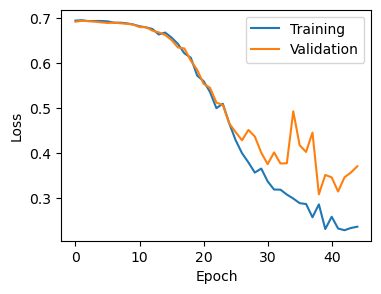

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4,3))
plt.plot(train_loss, label='Training')
plt.plot(validation_loss, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim(0)
plt.legend();

In [53]:
with torch.no_grad():
    model.eval()
    pred_list = []
    labels_list = []
    for i, (data, target) in enumerate(valid_loader):
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        pred=output.cpu().detach().numpy().reshape(output.shape[0])
        labels=target.cpu().numpy().reshape(output.shape[0])
        pred_list.append(pred)
        labels_list.append(labels)
    labels = np.concatenate(labels_list)
    predictions = np.concatenate(pred_list)
    auc = metrics.roc_auc_score(labels, predictions)
    print('AUC on validation data ', auc)

AUC on validation data  0.9569541231126597


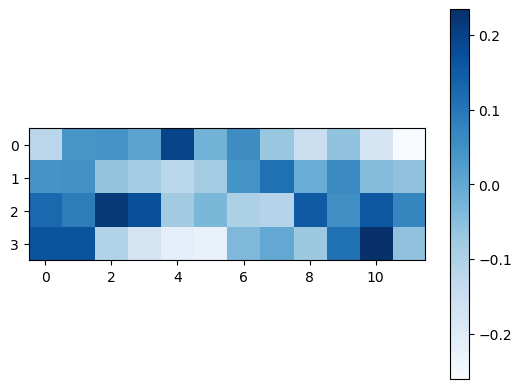

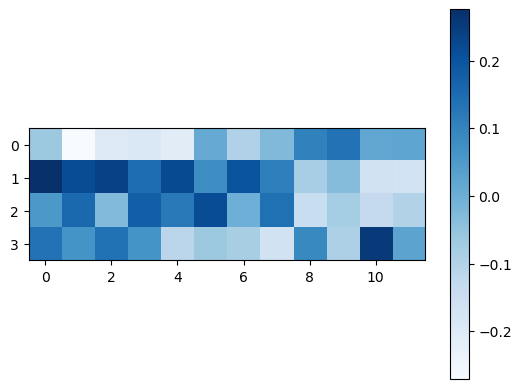

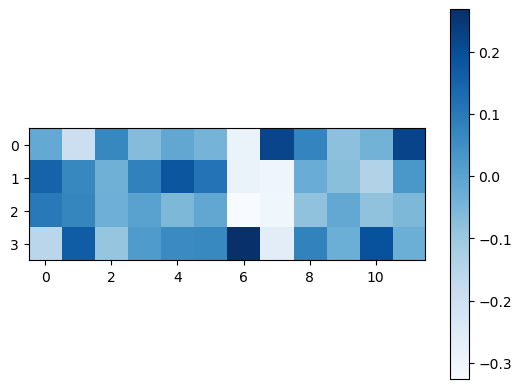

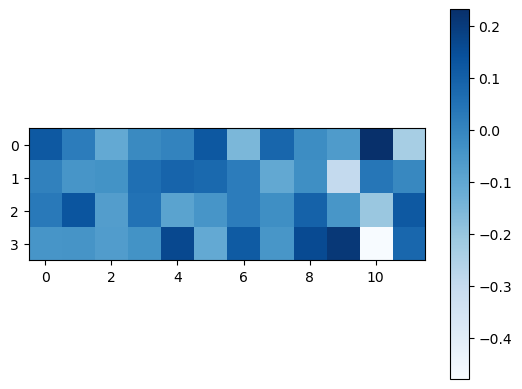

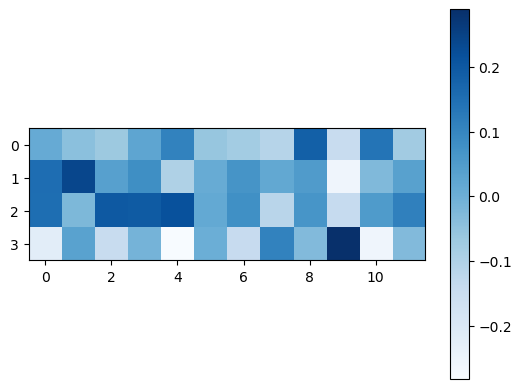

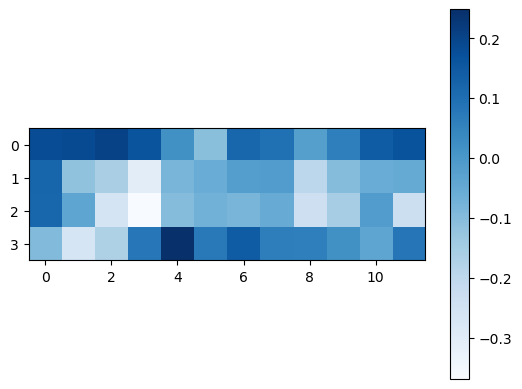

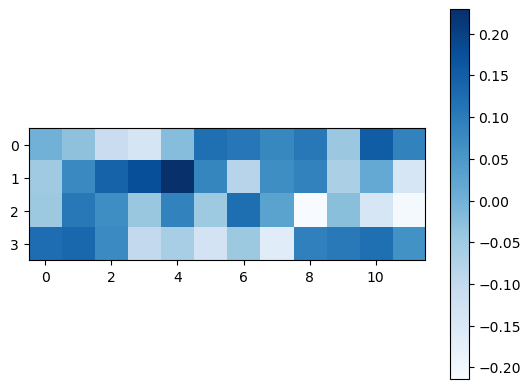

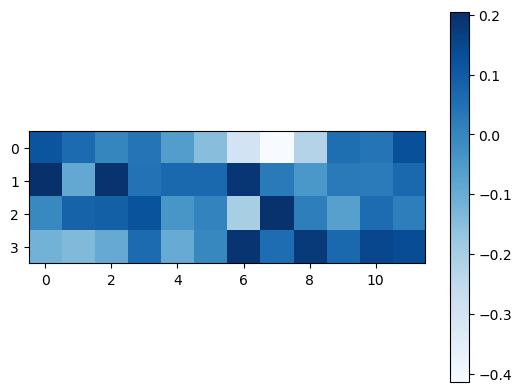

In [54]:
import matplotlib.pyplot as plt

# convert the convolutional filters to a numpy array:
weights=model.conv_block[0].weight.detach().cpu().numpy()

# plot the convolutional filters:
for filter in range(len(weights)) :
    fig = plt.figure()
    plt.imshow(weights[filter],cmap="Blues")
    plt.colorbar()

### Part 3:  experiments with network architecture and hyperparameters


With the implementation you created in Part 2, your next task is to explore the space of hyperparameters and architecture choices to determine their effect on the performance of your three-layer network.  Choose four aspects of the network to explore (e.g. the learning rate, whether dropout is helpful, the choice of activation function, etc.).  Which aspects of the model seem to have the most effect on the accuracy of the network?  Do the best parameter values vary from dataset to dataset?  Is your three layer network able to match or exceed the performance of a single layer network?

In [55]:
#Dropout rates, where is the
dropRates=np.array([0.05,0.1,0.2,0.3])#,0.6])

#

activationFunctions = np.array(["SGD","ADAM"])
#This is optimizers......
#You are an idiot hunter
#

learningRates = np.array([0.001,0.005,0.01,0.05])#,0.1])

#
conFilterSizes = np.array([4,8,12,16,20])

#testTrainSplitSize = []

hyperparams=[dropRates,activationFunctions,learningRates,conFilterSizes]

In [56]:
'''results_array = []
for dr in hyperparams[0]:
    #print(dr)
    for af in hyperparams[1]:
        #print(af)
        for lr in hyperparams[2]:
            #print(lr)
            for cf in hyperparams[3]:
                #print(cf)
                results_array.append(runModels(optim=af,learnRate=lr,pat=3,epochs=100,drop=dr,kernel_dims=[cf,32]))'''

'results_array = []\nfor dr in hyperparams[0]:\n    #print(dr)\n    for af in hyperparams[1]:\n        #print(af)\n        for lr in hyperparams[2]:\n            #print(lr)\n            for cf in hyperparams[3]:\n                #print(cf)\n                results_array.append(runModels(optim=af,learnRate=lr,pat=3,epochs=100,drop=dr,kernel_dims=[cf,32]))'

In [57]:
#results_array[0][2]

In [58]:
import scipy
import scipy.stats

class CNNSummary():#n=1,dr=0.15,af="ADAM",lr=0.01,
                  #   cfs=8):
    #def __init__(self, num_kernels=[8, 32], kernel_size=12,
        #         sigma_conv=1e-2, sigma_w=1e-2,drop_rate=0.2,patience=3):
    def __init__(self, num_kernels=[8, 32], kernel_size=12,
                 sigma_conv=1e-2, sigma_w=1e-2,drop_rate=0.2,patience=3,af="ADAM",n=1,
                 learn_rate=0.01,epochs=100):
        #self.sigma_conv=sigma_conv
        #self.sigma_w=sigma_w
        self.drop_rate=drop_rate
        self.num_kernels=num_kernels
        self.kernel_size=kernel_size
        self.patience=patience
        self.activation_function=af
        self.n=n
        self.learn_rate=learn_rate
        self.epochs=epochs
        self.acc_vec=[]
        self.train_loss=[]
        self.val_loss=[]
        self.models=[]
        self.aucs=[]
        self.final_acc=[]


    #KIND OF A HACK RIGHT NOW, REPLACE WITH VALID LOADER AS OBJECT 
    #PROBABLY EVENTUALLY RESAMPLE EVERYTHING
    def calcAUC(self,n):
        with torch.no_grad():
            self.models[n].eval()
            pred_list = []
            labels_list = []
            for i, (data, target) in enumerate(valid_loader):
                data = data.to(device)
                target = target.to(device)
                output = self.models[n](data)
                pred=output.cpu().detach().numpy().reshape(output.shape[0])
                labels=target.cpu().numpy().reshape(output.shape[0])
                pred_list.append(pred)
                labels_list.append(labels)
            labels = np.concatenate(labels_list)
            predictions = np.concatenate(pred_list)
            auc = metrics.roc_auc_score(labels, predictions)
        return auc
            #print('AUC on validation data ', auc)


    def getModel(self,n):
        return self.models[n]

    def trainModels(self):
        for i in range(self.n):
            train_loss,validation_loss,acc,model=runModels(optim=self.activation_function,learnRate=self.learn_rate,
                    pat=self.patience,epochs=self.epochs,drop=self.drop_rate,kernel_dims=self.num_kernels)
            self.train_loss.append(train_loss)
            self.val_loss.append(validation_loss)
            self.acc_vec.append(acc)
            self.models.append(model)
            self.aucs.append(self.calcAUC(i))
            self.final_acc.append(acc[-1])
        return 1

    def plotLoss(self,n):
        from matplotlib import pyplot as plt
        plt.figure(figsize=(4,3))
        plt.plot(self.train_loss[n], label='Training')
        plt.plot(self.validation_loss[n], label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        #plt.ylim(0)
        plt.legend();
        return 1
        
    def plotConvs(self,n,filterSubset=False):
        weights=self.models[0].conv_block[0].weight.detach().cpu().numpy()
        # plot the convolutional filters:
        for filter in range(len(weights)) :
            fig = plt.figure()
            plt.imshow(weights[filter],cmap="Blues")
            plt.colorbar()
        return 1

    #train_loss,validation_loss,acc,model = runModels(optim="ADAM",learnRate=0.005,pat=3,epochs=100,drop=0.2)

    def returnSummary(self):
        return np.mean(self.final_acc),scipy.stats.sem(self.final_acc),np.mean(self.aucs),scipy.stats.sem(self.aucs)
    def printSummary(self):
        print('Average accuracy is ', np.mean(self.final_acc))
        print('Standard error of accuracy is ', scipy.stats.sem(self.final_acc))
        print('Average AUC on validation data', np.mean(self.aucs))
        print('Standard error of AUC on validation data', scipy.stats.sem(self.aucs))
def summarizeResults(n=5,dropRates=[0.15],activationFunctions=["ADAM"],learningRates=[0.01],
                     conFilterSizes=[8]):
    numRows=len(dropRates)*len(activationFunctions)*len(learningRates)*len(conFilterSizes)
    sumsCol = np.empty(numRows,dtype=object)
    accsCol= np.empty(numRows)
    accsSeCol= np.empty(numRows)
    aucsCol= np.empty(numRows)
    aucsSeCol = np.empty(numRows)
    dropCol = np.empty(numRows)
    afCol = np.empty(numRows,dtype=object)
    lrCol = np.empty(numRows)
    cfsCol = np.empty(numRows)
    #index=range(numRows)
    print(numRows)
    
    count=0
    for dr in dropRates:
        for af in activationFunctions:
            for lr in learningRates:
                for cfs in conFilterSizes:
                    sumCNN = CNNSummary(n=n,learn_rate=lr,num_kernels=[8,32],kernel_size=cfs,drop_rate=dr,patience=3,epochs=100,af=af)
                    sumCNN.trainModels()
                    accsCol[count],accsSeCol[count],aucsCol[count],aucsSeCol[count] = sumCNN.returnSummary()
                    dropCol[count]=dr
                    afCol[count]=af
                    lrCol[count]=lr
                    cfsCol[count]=cfs
                    sumsCol[count]=sumCNN
                    count+=1
    #print(count)
    #print("Here!")
    data = {"Drop Rate":dropCol, "Activation Function":afCol,"Learning Rates":lrCol,"CF Size":cfsCol,"Mean Accuracy":accsCol,
            "Accuracy Standard Error":accsSeCol,"Mean AUC":aucsCol,"AUC Standard Error":aucsSeCol,"SummaryObject":sumsCol}
    retFrame = pd.DataFrame(data)
    #retFrame = pd.DataFrame(data=np.array([dropCol,afCol,lrCol,cfsCol,accsCol,accsSeCol,aucsCol,aucsSeCol,sumsCol],dtype=object),
    #                columns=["Drop Rate", "Activation Function","Learning Rates","CF Size","Mean Accuracy","Accuracy Standard Error","Mean AUC","AUC Standard Error","SummaryObject"])#,index=(9,2))
    return retFrame
#    return 1



#results_array.append(runModels(optim=af,learnRate=lr,pat=3,epochs=100,drop=dr,kernel_dims=[cf,32]))

In [59]:
testSumRes=summarizeResults() 

1
training loss: 0.694940
Test Accuracy: 0.530120
Avg test loss: 0.692390 

Count is 1
training loss: 0.465127
Test Accuracy: 0.762048
Avg test loss: 0.535122 

Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
training loss: 0.235162
Test Accuracy: 0.626506
Avg test loss: 1.071820 

Count is 1
Count is 1
Count is 1
Count is 1
Count is 1
Count is 2
training loss: 0.214307
Test Accuracy: 0.792169
Avg test loss: 0.495587 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
training loss: 0.698814
Test Accuracy: 0.506024
Avg test loss: 0.692904 

training loss: 0.523306
Test Accuracy: 0.743976
Avg test loss: 0.538666 

Count is 1
Count is 1
Count is 1
Count is 1
Count is 2
training loss: 0.306549
Test Accuracy: 0.855422
Avg test loss: 0.346454 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
training loss: 0.697124
Test Accuracy: 0.493976
Avg test loss: 0.695112 

Count is 1
training loss: 0.598114
Test Accuracy: 0.659639
Avg test loss: 0.

In [60]:
testSumRes

,Drop Rate,Activation Function,Learning Rates,CF Size,Mean Accuracy,Accuracy Standard Error,Mean AUC,AUC Standard Error,SummaryObject
0,0.15,ADAM,0.01,8.0,0.677711,0.02511,0.890215,0.034872,<__main__.CNNSummary object at 0x0000027D8C79A...


In [61]:
dropRates=np.array([0.05,0.1,0.2,0.3])#,0.6])

#

activationFunctions = np.array(["SGD","ADAM"])
#This is optimizers......
#You are an idiot hunter
#

learningRates = np.array([0.001,0.005,0.01])#,0.1])

#
conFilterSizes = np.array([4,8,12,16,20])

testSumRes=summarizeResults(dropRates=dropRates,learningRates=learningRates,conFilterSizes=conFilterSizes,activationFunctions=activationFunctions) 

120
training loss: 0.697023
Test Accuracy: 0.506024
Avg test loss: 0.694768 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
training loss: 0.692591
Test Accuracy: 0.506024
Avg test loss: 0.692036 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
Count is 2
Count is 1
training loss: 0.693879
Test Accuracy: 0.506024
Avg test loss: 0.692640 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
Count is 1
training loss: 0.694229
Test Accuracy: 0.493976
Avg test loss: 0.692518 

Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
training loss: 0.692897
Test Accuracy: 0.506024
Avg test loss: 0.693067 

Count is 1
Count is 1
Count is 1
Count is 1
training loss: 0.693025
Test Accuracy: 0.506024
Avg test loss: 0.693682 

Count is 1
Count is 2
Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Count is 2
Count is 3
training loss: 0.696277
Test Accuracy: 0.506024
Avg test loss: 0.701676 

Count is 1
Count is 1
Count is 1
Count is 1
training loss: 0

In [72]:
testSumRes

,Drop Rate,Activation Function,Learning Rates,CF Size,Mean Accuracy,Accuracy Standard Error,Mean AUC,AUC Standard Error,SummaryObject
0,0.05,SGD,0.001,4.0,0.504217,0.002951,0.517599,0.018662,<__main__.CNNSummary object at 0x0000027D999ED...
1,0.05,SGD,0.001,8.0,0.527108,0.016387,0.546073,0.018161,<__main__.CNNSummary object at 0x0000027D8B976...
2,0.05,SGD,0.001,12.0,0.490964,0.005472,0.520129,0.020649,<__main__.CNNSummary object at 0x0000027D99F54...
3,0.05,SGD,0.001,16.0,0.511446,0.010320,0.532477,0.021191,<__main__.CNNSummary object at 0x0000027D99FE0...
4,0.05,SGD,0.001,20.0,0.503012,0.007796,0.531704,0.015298,<__main__.CNNSummary object at 0x0000027D999D5...
...,...,...,...,...,...,...,...,...,...
115,0.30,ADAM,0.010,4.0,0.689759,0.073113,0.789852,0.086505,<__main__.CNNSummary object at 0x0000027D9B6F3...
116,0.30,ADAM,0.010,8.0,0.766265,0.042794,0.904384,0.030926,<__main__.CNNSummary object at 0x0000027D9B5CA...
117,0.30,ADAM,0.010,12.0,0.631325,0.057400,0.817015,0.039818,<__main__.CNNSummary object at 0x0000027D9B16D...
118,0.30,ADAM,0.010,16.0,0.707831,0.056035,0.869933,0.044012,<__main__.CNNSummary object at 0x0000027D9B491...


In [73]:
max(testSumRes["Mean AUC"])

0.9663327526132404

In [74]:
max(testSumRes["Mean Accuracy"])

0.8777108433734939

In [75]:
testSumRes.to_csv("InitialChipMeSummary.csv",index=False)

In [66]:
testCNN = CNNSummary(n=5,learn_rate=0.001,num_kernels=[12,64],kernel_size=12,drop_rate=0.2,patience=3,epochs=100,af="ADAM")
#optim="ADAM",learnRate=0.001,pat=3,epochs=100,drop=0.2,kernel_size=12,kernel_dims=[12,32]
testCNN.trainModels()

training loss: 0.695294
Test Accuracy: 0.493976
Avg test loss: 0.693135 

Count is 1
Count is 1
training loss: 0.688765
Test Accuracy: 0.771084
Avg test loss: 0.688171 

training loss: 0.541982
Test Accuracy: 0.656627
Avg test loss: 0.609097 

Count is 1
Count is 1
Count is 1
training loss: 0.414500
Test Accuracy: 0.792169
Avg test loss: 0.492992 

Count is 1
Count is 1
Count is 1
training loss: 0.336823
Test Accuracy: 0.807229
Avg test loss: 0.484872 

Count is 1
Count is 1
Count is 1
Count is 1
Count is 1
training loss: 0.273480
Test Accuracy: 0.843373
Avg test loss: 0.447478 

Count is 1
Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
training loss: 0.230975
Test Accuracy: 0.804217
Avg test loss: 0.463151 

Count is 1
Count is 1
Count is 1
Count is 2
Count is 1
Count is 1
Count is 2
Count is 1
training loss: 0.179967
Test Accuracy: 0.846386
Avg test loss: 0.355099 

Count is 1
Count is 1
Count is 1
training loss: 0.184571
Test Accuracy: 0.843373
Avg test loss: 0.377948 

Coun

1

In [67]:
testCNN.returnSummary()

(0.8759036144578314,
 0.019622286114340148,
 0.9547110917537747,
 0.008748386960760225)

In [68]:
testCNN.printSummary()

Average accuracy is  0.8759036144578314
Standard error of accuracy is  0.019622286114340148
Average AUC on validation data 0.9547110917537747
Standard error of AUC on validation data 0.008748386960760225


In [69]:
testFilt=weights[0]
print(testFilt)
print(testFilt.shape)

[[-1.21077977e-01  3.86950262e-02  4.24194671e-02  8.51682015e-03
   1.94064215e-01 -2.30283327e-02  5.65584190e-02 -6.85743168e-02
  -1.50173023e-01 -6.03527837e-02 -1.77299097e-01 -2.60119885e-01]
 [ 4.12431136e-02  4.68736179e-02 -6.27918243e-02 -8.36657584e-02
  -1.18794493e-01 -8.31245407e-02  4.44429740e-02  1.11374088e-01
  -1.09325619e-02  6.16572089e-02 -4.46688347e-02 -5.80674149e-02]
 [ 1.27119422e-01  8.68917406e-02  2.14734480e-01  1.74905807e-01
  -8.18553641e-02 -3.35483775e-02 -9.64516178e-02 -1.12001412e-01
   1.53367683e-01  5.23226745e-02  1.58783019e-01  7.10832104e-02]
 [ 1.65364310e-01  1.65120363e-01 -1.06232822e-01 -1.73033193e-01
  -2.11478651e-01 -2.22348347e-01 -3.64201777e-02 -2.42336508e-04
  -7.39006698e-02  1.08740345e-01  2.34014571e-01 -5.84451929e-02]]
(4, 12)


In [76]:
#weights=model.conv_block[0].weight.detach().cpu().numpy()

    # plot the convolutional filters:
    #for filter in range(len(weights)) :
    #fig = plt.figure()
    #plt.imshow(weights[filter],cmap="Blues")
    #plt.colorbar()

def getConsensusSeq(convFilter):
    seqLen=convFilter.shape[1]
    for i in range(seqLen):
        print(np.sum(convFilter[:,i]))
    
    

getConsensusSeq(testFilt)

0.21264887
0.33758074
0.0881293
-0.073276326
-0.2180643
-0.36204958
-0.0318704
-0.06944398
-0.081638575
0.16236745
0.17082965
-0.30554926


### Coding and reporting your results

In your notebook, I do not want to see repetitive code.  Such code belongs in a function!
In your reporting, make sure your results are clearly presented.  I recommend using a table format, and your table can be populated by your code.  pandas DataFrame objects render nicely in Jupyter notebooks.  Here's an example:


In [71]:
import pandas as pd
import numpy as np

knn_accuracy = np.random.rand(10)
svm_accuracy = np.random.rand(10)
data = [
    ['KNN', np.mean(knn_accuracy), np.std(knn_accuracy)],
    ['SVM', np.mean(svm_accuracy), np.std(svm_accuracy)],
]
pd.DataFrame(data, columns = ['Classifier', 'Mean accuracy', 'Standard Deviation'])

,Classifier,Mean accuracy,Standard Deviation
0,KNN,0.735450,0.240473
1,SVM,0.440444,0.326252


#### Grading

```
Part 1: dataset creation (20 pts)
Part 2: implementation of three layer network, early stopping, and multiple training (40 pts)
Part 3: experiments on network architecture (40 pts)
```